In [1]:
# Import necessary libraries
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline display of plots in the notebook
%matplotlib inline

# Create a BigQuery client
client = bigquery.Client.from_service_account_json("C:\\Users\\GalipŞahin\\Desktop\\Kişisel\\Dream\\galipsahin15.json")

# Query the dataset_cost data
query = """
SELECT *
FROM `casedreamgames.Analytics.dataset_cost`
"""
df_cost = client.query(query).to_dataframe()

# Display the first few rows
print("First few rows:")
print(df_cost.head())

# Print the number of rows fetched
print(f"Total number of rows fetched: {df_cost.shape[0]}")

# Convert the date column to datetime format
df_cost['date'] = pd.to_datetime(df_cost['date'])

# Display the general summary of the dataset
print(df_cost.info())


First few rows:
         date network country platform   cost
0  2021-05-20     Sid   Venus  android    0.0
1  2021-05-25     Sid   Venus      ios  642.0
2  2021-05-16     Sid   Venus      ios  576.0
3  2021-05-16     Sid   Venus  android    0.0
4  2021-05-15     Sid   Venus  android    0.0
Total number of rows fetched: 1357
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1357 non-null   datetime64[ns]
 1   network   1357 non-null   object        
 2   country   1357 non-null   object        
 3   platform  1357 non-null   object        
 4   cost      1357 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 53.1+ KB
None


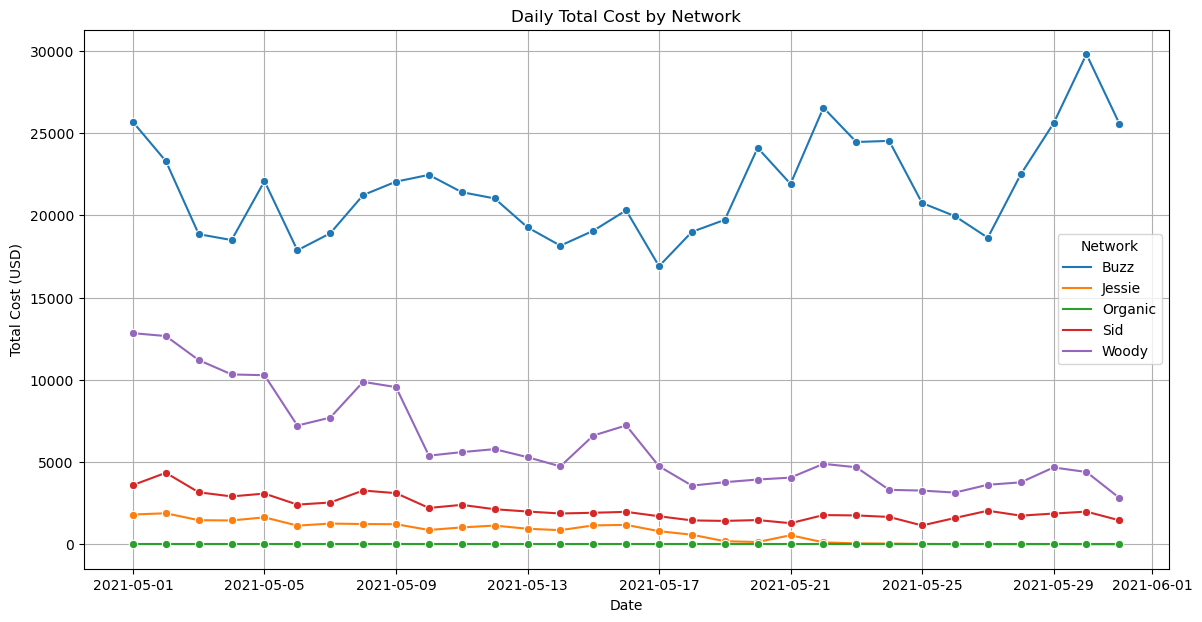

In [2]:
# Calculate the daily total cost by network
daily_network_cost = df_cost.groupby(['date', 'network'])['cost'].sum().reset_index()

# Plot the daily total cost by network
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_network_cost, x='date', y='cost', hue='network', marker='o')
plt.title('Daily Total Cost by Network')
plt.xlabel('Date')
plt.ylabel('Total Cost (USD)')
plt.grid(True)
plt.legend(title='Network')
plt.show()


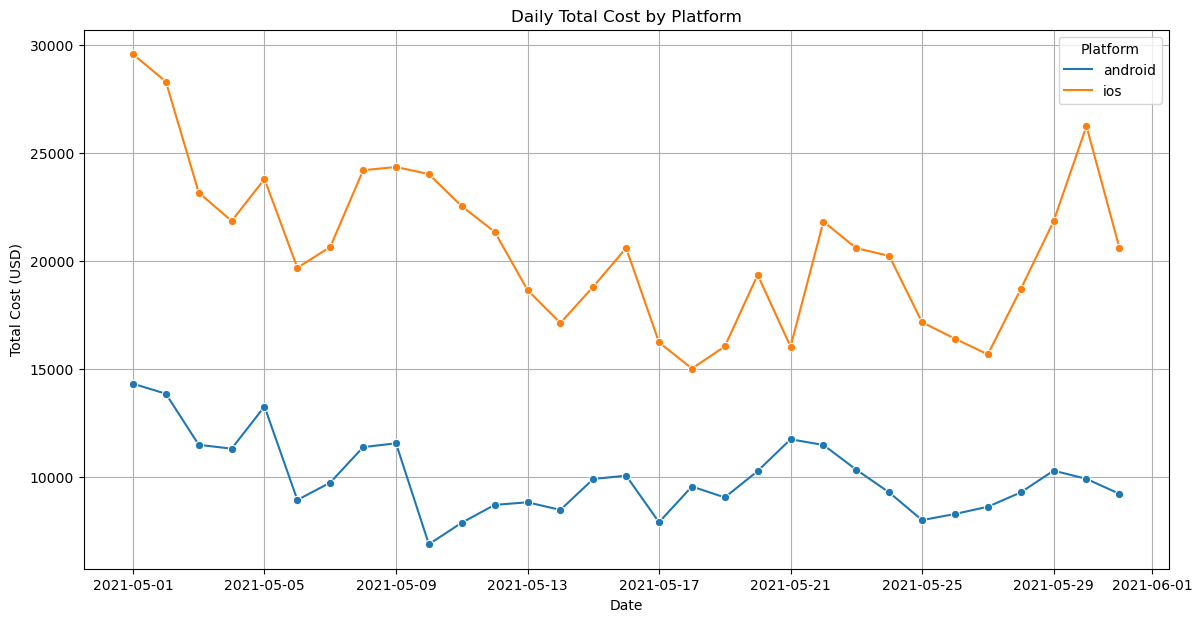

In [3]:
# Calculate the daily total cost by platform
daily_platform_cost = df_cost.groupby(['date', 'platform'])['cost'].sum().reset_index()

# Plot the daily total cost by platform
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_platform_cost, x='date', y='cost', hue='platform', marker='o')
plt.title('Daily Total Cost by Platform')
plt.xlabel('Date')
plt.ylabel('Total Cost (USD)')
plt.grid(True)
plt.legend(title='Platform')
plt.show()


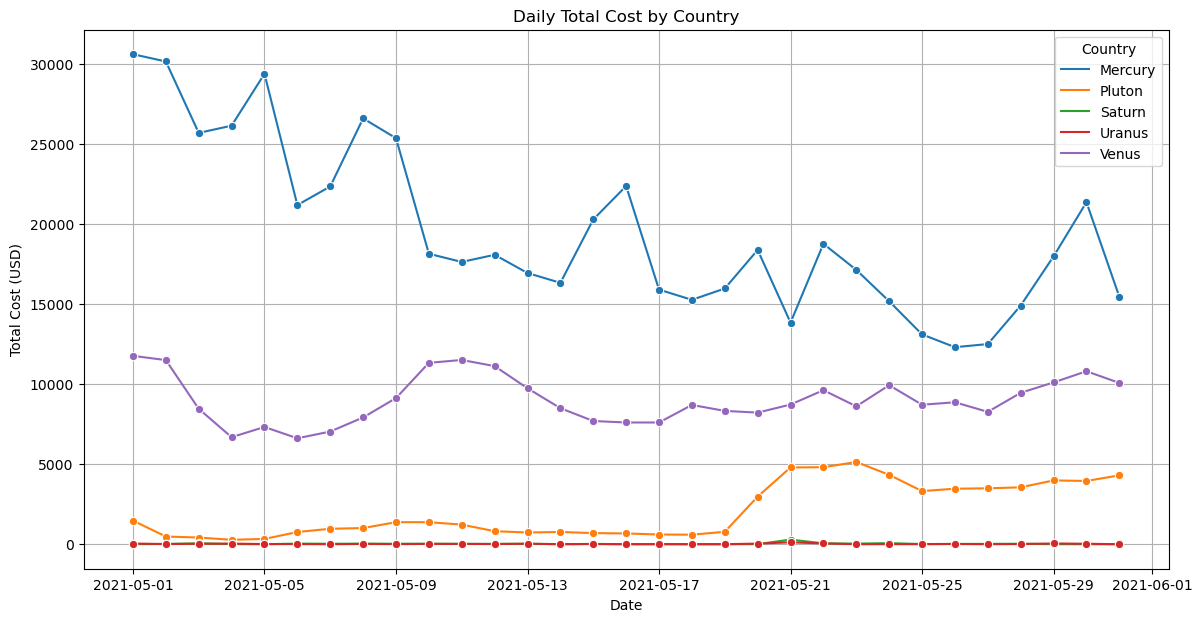

In [4]:
# Calculate the daily total cost by country
daily_country_cost = df_cost.groupby(['date', 'country'])['cost'].sum().reset_index()

# Plot the daily total cost by country
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_country_cost, x='date', y='cost', hue='country', marker='o')
plt.title('Daily Total Cost by Country')
plt.xlabel('Date')
plt.ylabel('Total Cost (USD)')
plt.grid(True)
plt.legend(title='Country')
plt.show()


C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_10764\243847272.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_cost = country_network_cost.pivot('country', 'network', 'total_cost')
C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_10764\243847272.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_count = country_network_cost.pivot('country', 'network', 'count')


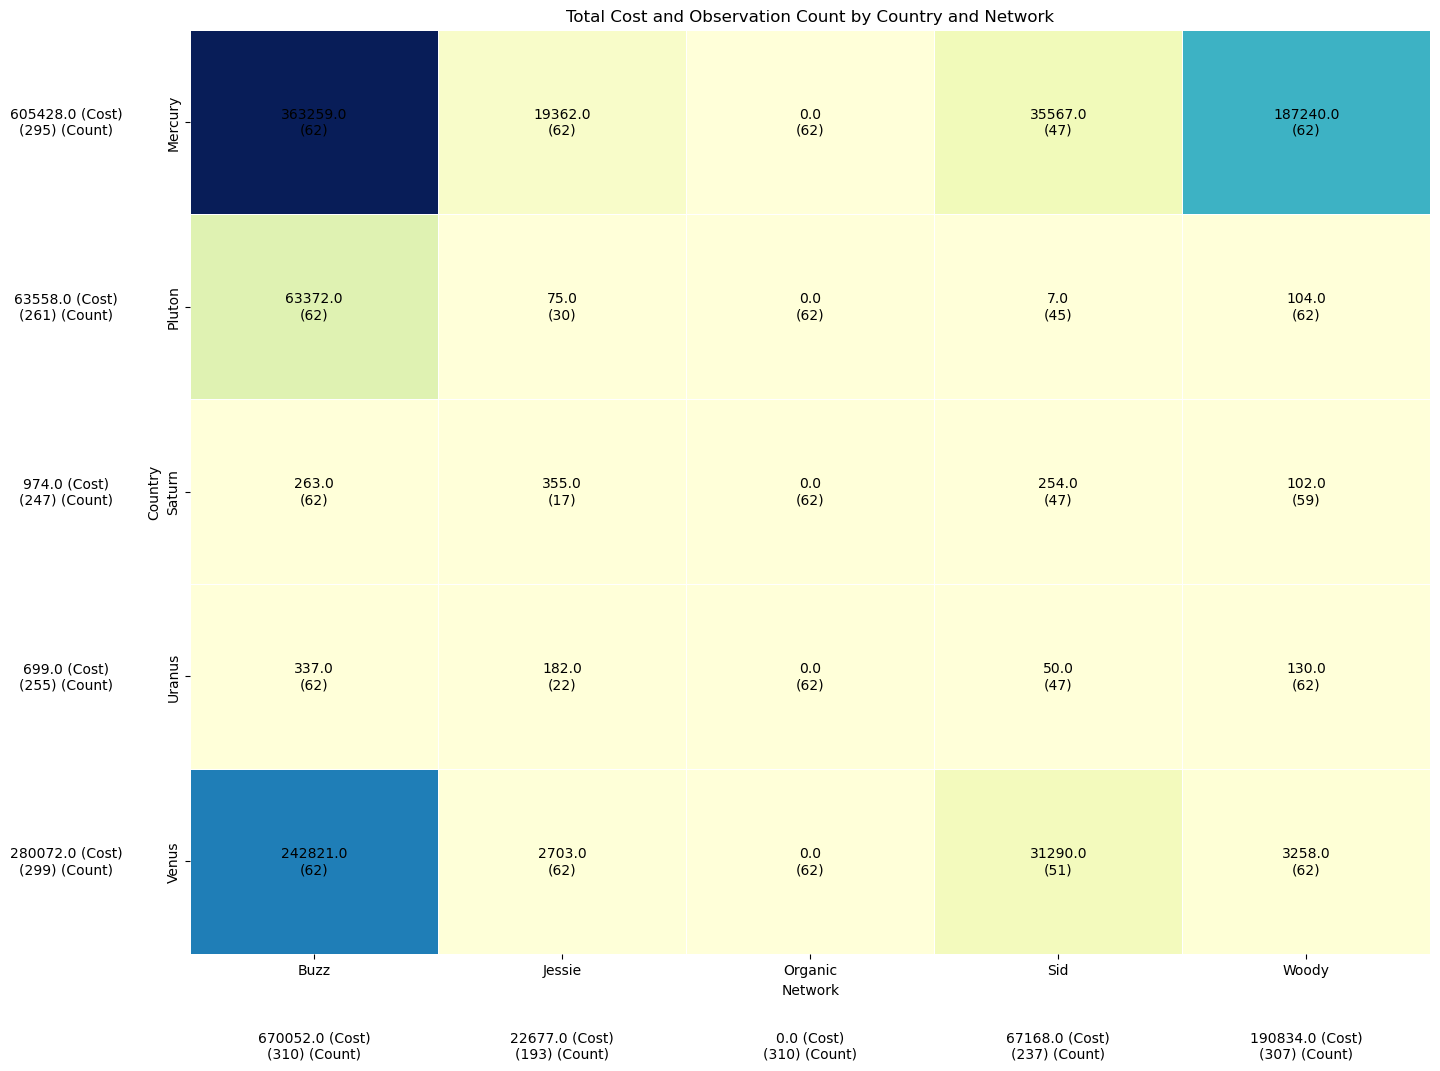

In [5]:
# Calculate the total cost and observation count by country and network
country_network_cost = df_cost.groupby(['country', 'network']).agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Create pivot table for heatmap
pivot_cost = country_network_cost.pivot('country', 'network', 'total_cost')
pivot_count = country_network_cost.pivot('country', 'network', 'count')

# Calculate the total cost and observation count by country
total_country_cost = df_cost.groupby('country').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Calculate the total cost and observation count by network
total_network_cost = df_cost.groupby('network').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Create heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(pivot_cost, annot=False, cmap="YlGnBu", linewidths=.5, cbar=False)

# Add cost and observation counts to the heatmap
for i in range(pivot_cost.shape[0]):
    for j in range(pivot_cost.shape[1]):
        cost = pivot_cost.iloc[i, j]
        count = pivot_count.iloc[i, j]
        if not pd.isna(cost):
            heatmap.text(j + 0.5, i + 0.5, f'{cost:.1f}\n({count})', ha='center', va='center', color='black')

# Add total observation count and total cost below network labels
for j in range(pivot_cost.shape[1]):
    network = pivot_cost.columns[j]
    total_cost = total_network_cost[total_network_cost['network'] == network]['total_cost'].values[0]
    total_count = total_network_cost[total_network_cost['network'] == network]['count'].values[0]
    heatmap.text(j + 0.5, pivot_cost.shape[0] + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

# Add total observation count and total cost to the left of country labels
for i in range(pivot_cost.shape[0]):
    country = pivot_cost.index[i]
    total_cost = total_country_cost[total_country_cost['country'] == country]['total_cost'].values[0]
    total_count = total_country_cost[total_country_cost['country'] == country]['count'].values[0]
    heatmap.text(-0.5, i + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

plt.title('Total Cost and Observation Count by Country and Network')
plt.xlabel('Network')
plt.ylabel('Country')
plt.show()


C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_18348\232268091.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_cost = network_platform_cost.pivot('network', 'platform', 'total_cost')
C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_18348\232268091.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_count = network_platform_cost.pivot('network', 'platform', 'count')


platform   android       ios
network                     
Buzz      220422.0  449630.0
Jessie      7261.0   15416.0
Organic        0.0       0.0
Sid         6228.0   60940.0
Woody      75918.0  114916.0
platform  android  ios
network               
Buzz          155  155
Jessie        115   78
Organic       155  155
Sid            82  155
Woody         152  155
   network  total_cost  count
0     Buzz    670052.0    310
1   Jessie     22677.0    193
2  Organic         0.0    310
3      Sid     67168.0    237
4    Woody    190834.0    307
  platform  total_cost  count
0  android    309829.0    659
1      ios    640902.0    698


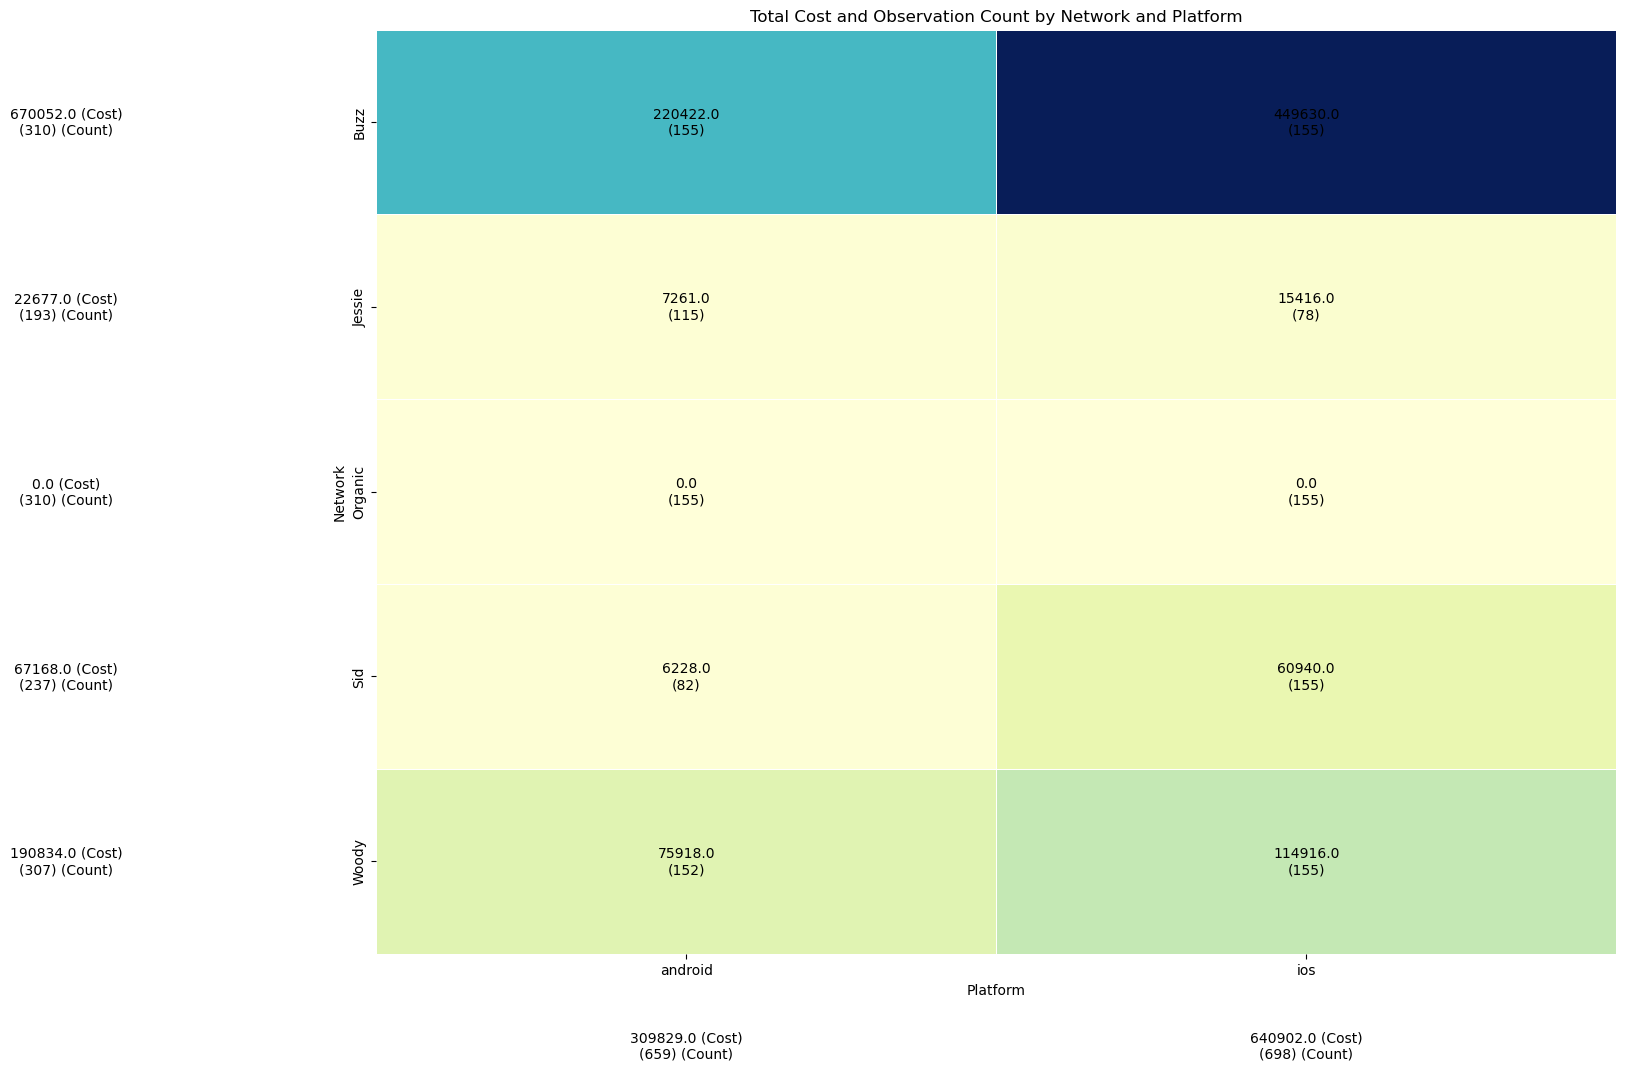

In [42]:
# Calculate total cost and count by network and platform
network_platform_cost = df_cost.groupby(['network', 'platform']).agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Pivot the data to prepare for the heatmap
pivot_cost = network_platform_cost.pivot('network', 'platform', 'total_cost')
pivot_count = network_platform_cost.pivot('network', 'platform', 'count')

# Calculate total cost and count by network
total_network_cost = df_cost.groupby('network').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Calculate total cost and count by platform
total_platform_cost = df_cost.groupby('platform').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Display the pivot tables for verification
print(pivot_cost.head())
print(pivot_count.head())
print(total_network_cost.head())
print(total_platform_cost.head())

# Create the heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(pivot_cost, annot=False, cmap="YlGnBu", linewidths=.5, cbar=False)

# Add cost and count annotations to the heatmap
for i in range(pivot_cost.shape[0]):
    for j in range(pivot_cost.shape[1]):
        cost = pivot_cost.iloc[i, j]
        count = pivot_count.iloc[i, j]
        if not pd.isna(cost):
            heatmap.text(j + 0.5, i + 0.5, f'{cost:.1f}\n({count})', ha='center', va='center', color='black')

# Add total cost and count annotations for platforms
for j in range(pivot_cost.shape[1]):
    platform = pivot_cost.columns[j]
    total_cost = total_platform_cost[total_platform_cost['platform'] == platform]['total_cost'].values[0]
    total_count = total_platform_cost[total_platform_cost['platform'] == platform]['count'].values[0]
    heatmap.text(j + 0.5, pivot_cost.shape[0] + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

# Add total cost and count annotations for networks
for i in range(pivot_cost.shape[0]):
    network = pivot_cost.index[i]
    total_cost = total_network_cost[total_network_cost['network'] == network]['total_cost'].values[0]
    total_count = total_network_cost[total_network_cost['network'] == network]['count'].values[0]
    heatmap.text(-0.5, i + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

# Set the title and labels for the heatmap
plt.title('Total Cost and Observation Count by Network and Platform')
plt.xlabel('Platform')
plt.ylabel('Network')
plt.show()


C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_10764\982471699.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_cost = platform_country_cost.pivot('platform', 'country', 'total_cost')
C:\Users\GalipŞahin\AppData\Local\Temp\ipykernel_10764\982471699.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_count = platform_country_cost.pivot('platform', 'country', 'count')


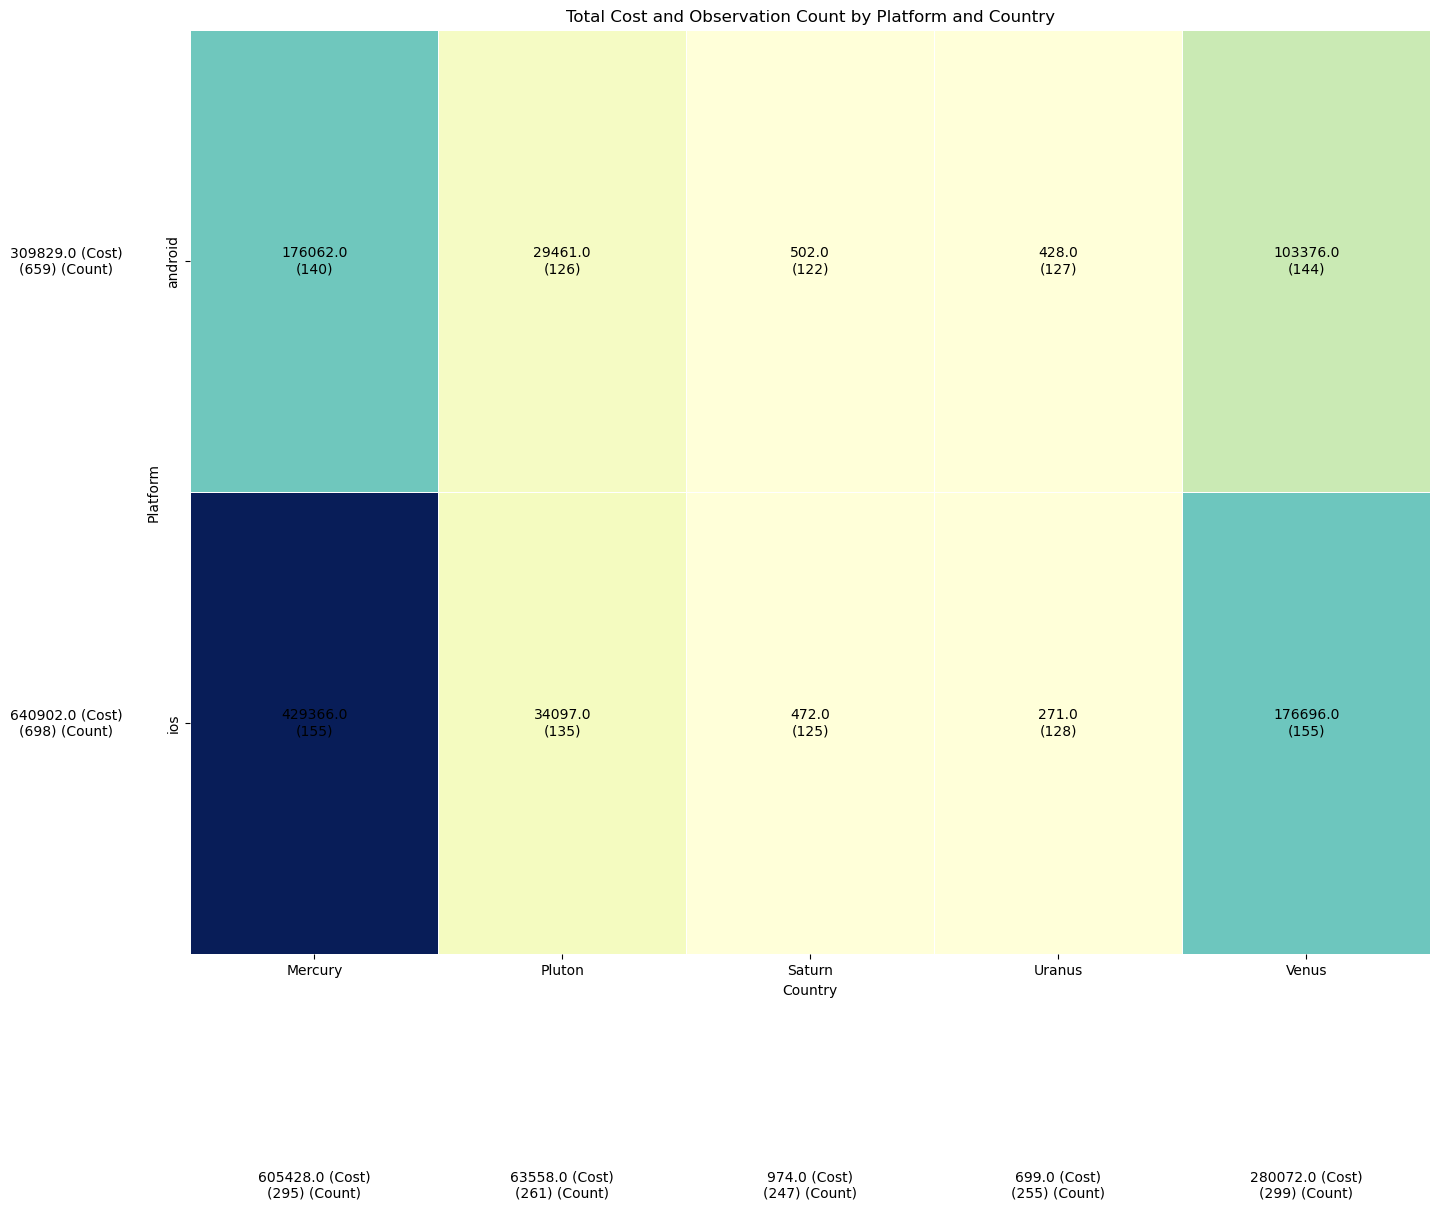

In [6]:
# Calculate the total cost and observation count by platform and country
platform_country_cost = df_cost.groupby(['platform', 'country']).agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Convert the data to pivot format for the heatmap
pivot_cost = platform_country_cost.pivot('platform', 'country', 'total_cost')
pivot_count = platform_country_cost.pivot('platform', 'country', 'count')

# Calculate the total cost and observation count by platform
total_platform_cost = df_cost.groupby('platform').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Calculate the total cost and observation count by country
total_country_cost = df_cost.groupby('country').agg(
    total_cost=pd.NamedAgg(column='cost', aggfunc='sum'),
    count=pd.NamedAgg(column='cost', aggfunc='count')
).reset_index()

# Create heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(pivot_cost, annot=False, cmap="YlGnBu", linewidths=.5, cbar=False)

# Add cost and observation counts to the heatmap
for i in range(pivot_cost.shape[0]):
    for j in range(pivot_cost.shape[1]):
        cost = pivot_cost.iloc[i, j]
        count = pivot_count.iloc[i, j]
        if not pd.isna(cost):
            heatmap.text(j + 0.5, i + 0.5, f'{cost:.1f}\n({count})', ha='center', va='center', color='black')

# Add total cost and observation counts for platforms
for j in range(pivot_cost.shape[1]):
    country = pivot_cost.columns[j]
    total_cost = total_country_cost[total_country_cost['country'] == country]['total_cost'].values[0]
    total_count = total_country_cost[total_country_cost['country'] == country]['count'].values[0]
    heatmap.text(j + 0.5, pivot_cost.shape[0] + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

# Add total cost and observation counts for countries
for i in range(pivot_cost.shape[0]):
    platform = pivot_cost.index[i]
    total_cost = total_platform_cost[total_platform_cost['platform'] == platform]['total_cost'].values[0]
    total_count = total_platform_cost[total_platform_cost['platform'] == platform]['count'].values[0]
    heatmap.text(-0.5, i + 0.5, f'{total_cost:.1f} (Cost)\n({total_count}) (Count)', ha='center', va='center', color='black')

# Set the title and labels for the heatmap
plt.title('Total Cost and Observation Count by Platform and Country')
plt.xlabel('Country')
plt.ylabel('Platform')
plt.show()
